In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
file = 'CAR_HISTORICALDATA.xlsx'
df = pd.read_excel(file)
df.columns = ["Date", "Value"]
df.sort_values(by=["Date"], inplace=True)
df.set_index("Date", inplace=True)
df.head()

,Value
Date,
1998-03-01,0.144047
1998-04-01,0.113069
1998-05-01,0.152788
1998-06-01,0.113146
1998-07-01,0.132997


In [3]:
df.index

DatetimeIndex(['1998-03-01', '1998-04-01', '1998-05-01', '1998-06-01',
               '1998-07-01', '1998-08-01', '1998-09-01', '1998-10-01',
               '1998-11-01', '1998-12-01',
               ...
               '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12',
               '2019-12-13', '2019-12-14', '2019-12-15', '2019-12-16',
               '2019-12-17', '2019-12-18'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [4]:
# get the average in 1998
df["1998"].Value.mean()

0.12137096584000003

# Resampling

In [5]:
# Resample data following years
df.Value.resample("Y").mean()

Date
1998-12-31    0.121371
1999-12-31    0.123644
2000-12-31    0.134082
2001-12-31         NaN
2002-12-31         NaN
2003-12-31         NaN
2004-12-31         NaN
2005-12-31         NaN
2006-12-31         NaN
2007-12-31         NaN
2008-12-31         NaN
2009-12-31         NaN
2010-12-31         NaN
2011-12-31         NaN
2012-12-31         NaN
2013-12-31         NaN
2014-12-31         NaN
2015-12-31         NaN
2016-12-31         NaN
2017-12-31         NaN
2018-12-31         NaN
2019-12-31    0.108137
Freq: A-DEC, Name: Value, dtype: float64

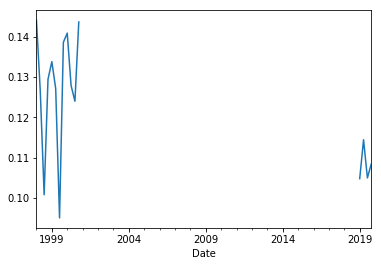

In [6]:
%matplotlib inline
df.Value.resample("Q").mean().plot()
#Q: quarterly (3 months once)

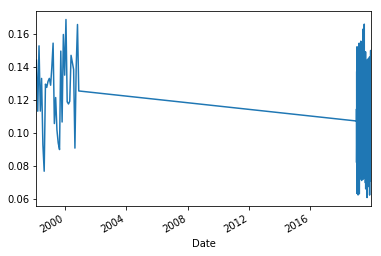

In [7]:
%matplotlib inline
df.Value.plot()
# non-sense?

# Method 1: Divide the dataset into 2 tables

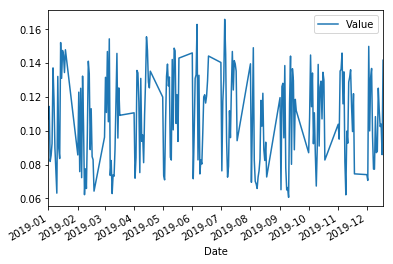

In [8]:
daily_record_2019 = df["2019":]
daily_record_2019.plot()

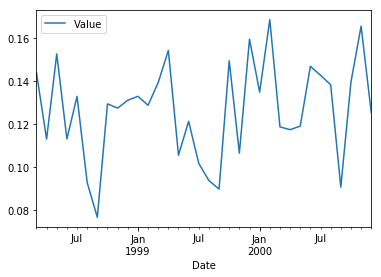

In [9]:
monthly_record = df[:"2018"]
monthly_record.plot()

# Method 2: Fixing the datetime

In [10]:
rng = pd.date_range(start="1998-02-01", end="2019-12-01", freq="MS")
rng

# MS: month start frequency

DatetimeIndex(['1998-02-01', '1998-03-01', '1998-04-01', '1998-05-01',
               '1998-06-01', '1998-07-01', '1998-08-01', '1998-09-01',
               '1998-10-01', '1998-11-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', length=263, freq='MS')

In [11]:
import random
for i in range(0, 12):
    randnum = random.randint(1,262)
    rng = rng.delete([randnum])
    
rng

DatetimeIndex(['1998-02-01', '1998-03-01', '1998-04-01', '1998-05-01',
               '1998-06-01', '1998-07-01', '1998-08-01', '1998-09-01',
               '1998-10-01', '1998-11-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', length=251, freq=None)

In [12]:
# changing indexes
df.index = rng

            Value
count  251.000000
mean     0.110646
std      0.026975
min      0.060596
25%      0.086698
50%      0.113069
75%      0.133009
max      0.168795
               Value
1998-02-01  0.144047
1998-03-01  0.113069
1998-04-01  0.152788
1998-05-01  0.113146
1998-06-01  0.132997


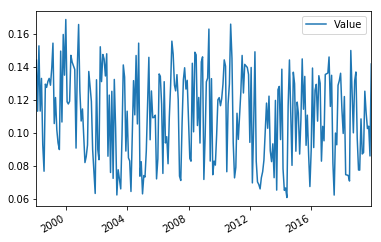

In [13]:
df.plot()
print(df.describe())
print(df.head())

# Scipy.stats

In [14]:
# Statistical analysis

# Linear Regression Model

In [15]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

# days with reshaped dates: option B
A = np.array(df.index)
B = np.reshape(A,(-1, 1))

# number of day: option C
C = df.index.factorize()[0].reshape(-1,1)

reg.fit(C, df.Value.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Value')

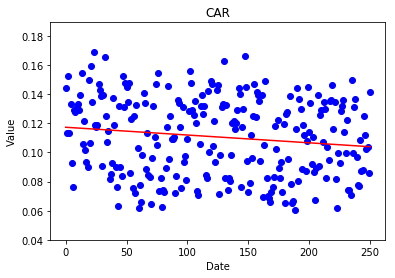

In [16]:
%matplotlib inline
plt.scatter(C, df.Value.values, c = 'b')
plt.plot(C ,reg.predict(C), c = 'r')
plt.title("CAR")
plt.xlabel("Date")
plt.ylabel("Value")

In [17]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Simple Exponential Smoothing (SES)

In [24]:
fit1 = SimpleExpSmoothing(df.Value.values).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')

AttributeError: 'numpy.ndarray' object has no attribute 'rename'

In [26]:
df.Value.head()

# report: NO DatetimeIndex

1998-02-01    0.144047
1998-03-01    0.113069
1998-04-01    0.152788
1998-05-01    0.113146
1998-06-01    0.132997
Name: Value, dtype: float64